# Group/Individual Challenge!

## Grain-Growth Time Scales

A typically-assumed gas to dust ratio, by mass, in the ISM is 100:1. 

Take a protostellar disk which at some radius has a typical number density of molecular hydrogen equal to 10^-7 cm^-3, and a mid-plane temperature of 150 K, which we will assume applies to both the gas and the dust. 

Assuming typical dust properties given here:

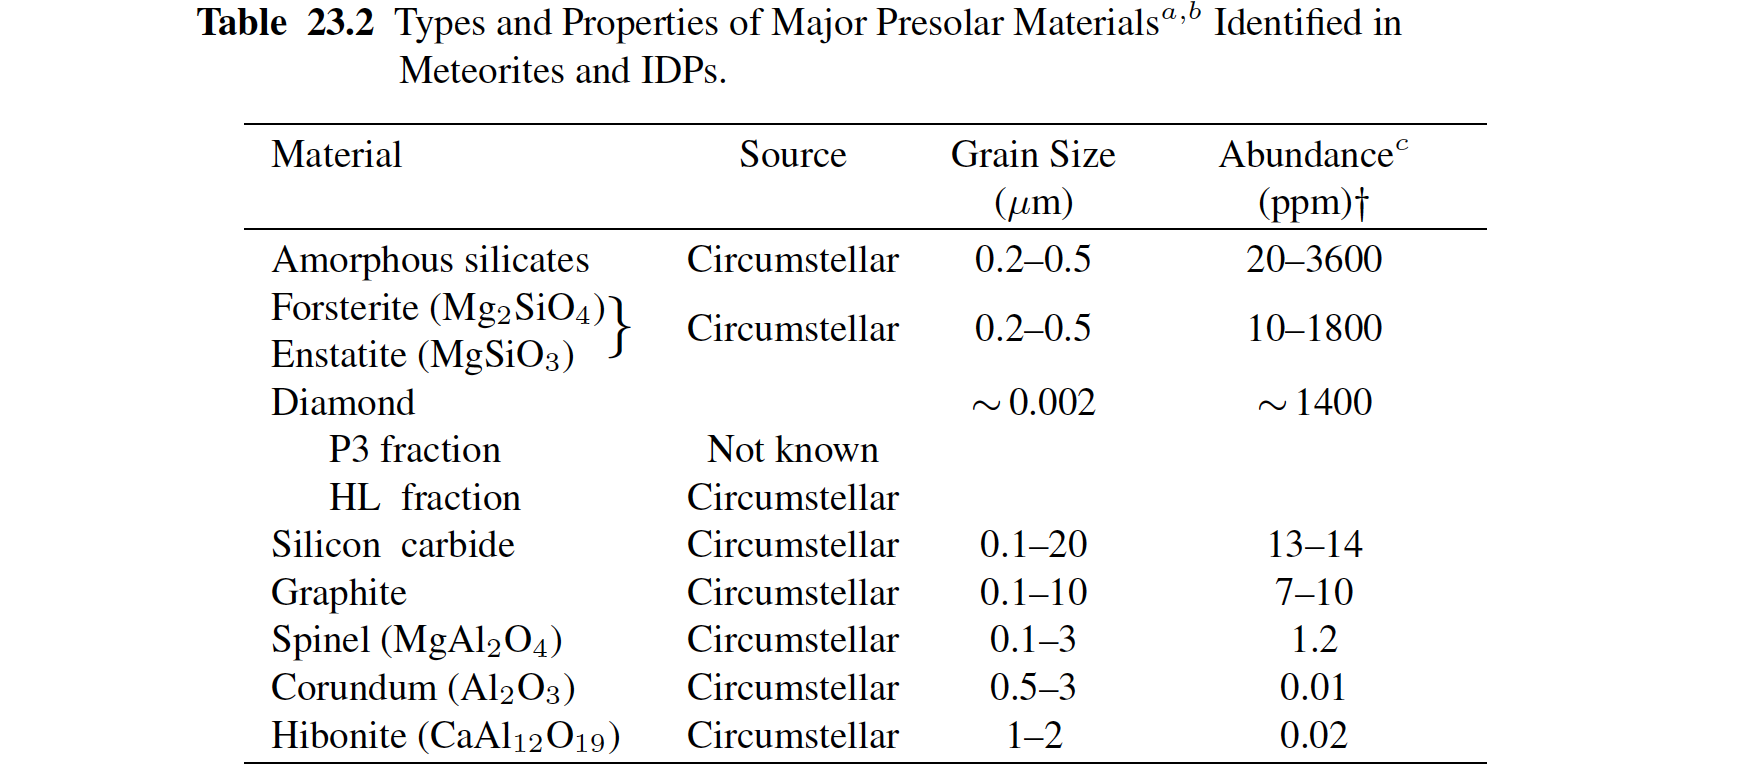

* What is the time scale for dust-dust collisions (how long on average would it take a single dust grain to experience a collision) in this region of the disk?

* How does the mean free path of a dust grain compare to the size of the solar system?

* If all of these collisions resulted in sticking (no bouncing or fragmentation), how long would it take for grains of this size to be depleted from the disk?






In [1]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion
from astropy.io import fits
from astropy import constants as const

                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer




In [29]:
T=150 *u.K #Mid-plane temperature
n=10**7 *u.cm**(-3)  #Number density of molecular hydrogen
d = 0.3 *u.micron #diameter of an amorphous silicate grain
rho = 2.65 *u.g *u.cm**(-3) #density of silicon dioxide
boltz = 1.380649e-16 * u.cm**2 * u.g * u.s**(-2) * u.K**(-1)


#Getting the mass of a dust grain
vol = (4/3)*np.pi*((d/2).to(u.cm))**3
mass = rho * vol

#Using the density of H2, the dust/gas ratio and the mass of the dust grain 
#we can get the number desnity of dust grains

n_dust = (n * (u.u.to(u.g)*u.g)) / (mass * 100) #weird stuff with that mass of hydrogen unit conversion

#Now we can get the thermal velocity 

vel = np.sqrt((8*boltz*T)/(np.pi*mass))

#Use the cross-section for dust-dust interaction to get collision rate 

k = n_dust * (np.pi*(d**2)) * vel
t_collision = (1/k).to(u.year)

print(f"Collisional Timescale = {t_collision:0.4}")

#To get the mean free path we just take the velocity of the grain times the timescale

l = t_collision.to(u.s) * vel

print(f"Mean Free Path = {l.to(u.au):0.4}.....Much smaller than the size of the Solar System")


Collisional Timescale = 2.131e+06 yr
Mean Free Path = 5.334 AU.....Much smaller than the size of the Solar System


The mean free path is much smaller than the size of the Solar System which is important for planet frmation. If the MFP was much bigger, dust grains would fly out of the Solar System before being able to build planets.